In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [2]:
df = pd.read_csv('Auto.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 1. Create a binary variable that takes on a value of 1 for cars with gas mileage above the median and 0 for cars with gas mileage below the median.

In [4]:
median_mpg = df['mpg'].median()

# Create a new column 'mpg_indicator' based on the median
df['mpg_indicator'] = np.where(df['mpg'] > median_mpg, 0, 1)

df.head()
df['mpg_indicator'].value_counts()

mpg_indicator
1    196
0    196
Name: count, dtype: int64

### 2. Fit a support vector classifier to the data using a linear kernel. Use a seed of 123, if needed. Experiment with different values of C to predict whether a car gets high or low gas mileage.

In [5]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year','origin']]
y = df['mpg_indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]

q2results = []

for C in C_values:
    svc_model = SVC(kernel='linear', C=C)
    svc_model.fit(X_train, y_train)

    y_pred = svc_model.predict(X_test)

    print(f"Results for C = {C}:")
    print(classification_report(y_test, y_pred))

    crosstab_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    print(crosstab_df)
    print("-" * 60)

    q2report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = q2report['accuracy']
    error_rate = 1 - accuracy

    q2results.append({
        'C Value': C,
        'Accuracy': accuracy,
        'Error Rate': error_rate
         })

Results for C = 0.001:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        55
           1       0.93      0.83      0.87        63

    accuracy                           0.87       118
   macro avg       0.88      0.88      0.87       118
weighted avg       0.88      0.87      0.87       118

Predicted   0   1
Actual           
0          51   4
1          11  52
------------------------------------------------------------
Results for C = 0.01:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        55
           1       0.92      0.87      0.89        63

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.89      0.89      0.89       118

Predicted   0   1
Actual           
0          50   5
1           8  55
------------------------------------------------------------
Results for C = 0.1:
              

### 3. Report the cross-validation errors associated with different values of this parameter. Discuss the empirical implications of those results.

In [7]:
q2results_df = pd.DataFrame(q2results)
q2results_df

,C Value,Accuracy,Error Rate
0,0.001,0.872881,0.127119
1,0.010,0.889831,0.110169
2,0.100,0.881356,0.118644
3,1.000,0.864407,0.135593
4,5.000,0.864407,0.135593
5,10.000,0.864407,0.135593
6,100.000,0.872881,0.127119


**Outcomes:**

C = 0.010: Error Rate = 11% (Lowest Error Rate - Best!)

C = (1,5,10): Error Rate = 13.6% (Highest Error Rate - Worst!)

**The Implications:**

Finding the Balance:
The 'C' value controls how complex the model tries to be.
1. Very Small C (like 0.001): Makes the model very simple. It did pretty well, but not the absolute best.
2. Medium C (like 0.01): This seems to be the sweet spot for this data. It's complex enough to find the pattern but simple enough not to get confused by noise.
3. Large C (1, 5, 10): Making the model even more flexible didn't help. The mistake rate stayed higher than the best setting, suggesting overfitting was still happening.

Choosing the Right Model:

Based on these tests, we should choose C = 0.01 for our final model because it's expected to make the fewest mistakes on new, unseen data.

### 4. Now repeat Q2, this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Discuss the empirical implications of those results.

In [8]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

kernels = ['rbf', 'poly']
gamma_values = [0.001, 0.01, 0.1, 1]
degree_values = [2, 3, 4]
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]

q4results = []

for kernel in kernels:
    for C in C_values:
        if kernel == 'rbf':
            for gamma in gamma_values:
                svc_model = SVC(kernel=kernel, C=C, gamma=gamma)
                svc_model.fit(X_train, y_train)
                y_pred = svc_model.predict(X_test)

                q4report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
                accuracy = q4report['accuracy']
                error_rate = 1 - accuracy

                q4results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Gamma': gamma,
                    'Accuracy': accuracy,
                    'Error Rate': error_rate
                })

        elif kernel == 'poly':
            for degree in degree_values:
                svc_model = SVC(kernel=kernel, C=C, degree=degree)
                svc_model.fit(X_train, y_train)
                y_pred = svc_model.predict(X_test)

                q4report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
                accuracy = q4report['accuracy']
                error_rate = 1 - accuracy

                q4results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Degree': degree,
                    'Accuracy': accuracy,
                    'Error Rate': error_rate
                })

q4results_df = pd.DataFrame(q4results)
q4results_df

,Kernel,C,Gamma,Accuracy,Error Rate,Degree
0,rbf,0.001,0.001,0.466102,0.533898,NaN
1,rbf,0.001,0.010,0.466102,0.533898,NaN
2,rbf,0.001,0.100,0.466102,0.533898,NaN
3,rbf,0.001,1.000,0.466102,0.533898,NaN
4,rbf,0.010,0.001,0.466102,0.533898,NaN
5,rbf,0.010,0.010,0.466102,0.533898,NaN
6,rbf,0.010,0.100,0.466102,0.533898,NaN
7,rbf,0.010,1.000,0.466102,0.533898,NaN
8,rbf,0.100,0.001,0.550847,0.449153,NaN
9,rbf,0.100,0.010,0.466102,0.533898,NaN


**Overall Best Result:**

The RBF kernel with C = 1.0 and Gamma = 0.001 was the clear winner.

Performance: It had the highest accuracy (making correct predictions 89.8%  of the time) and the lowest error rate (0.10).

Comparing Kernels (RBF vs. Polynomial):

RBF was very sensitive to the Gamma setting.
- If Gamma is too high (C ≥ 0.1), RBF performed poorly, sometimes worse than just guessing!
- It needed a small Gamma (C ≤ 0.1) combined with a moderate-to-high C (like 1, 5, or 10) to work well.

The Polynomial kernel gave decent results (best was 87.3% accuracy with C = 1, Degree = 2).
- Polynomial results were generally more stable across different Degree settings, especially once C was 0.1 or higher.
- It didn't have one setting that caused a total performance collapse like RBF did with high Gamma.

For this data, RBF seems better.

### 5. Generate relevant plots to support your findings in Q2 and Q4.

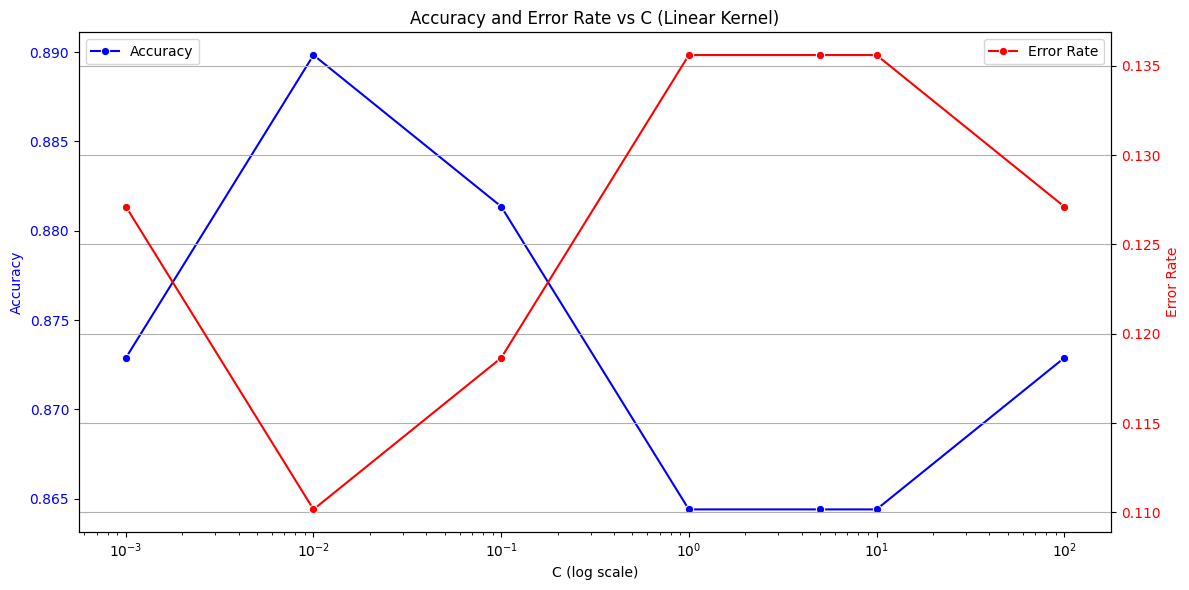

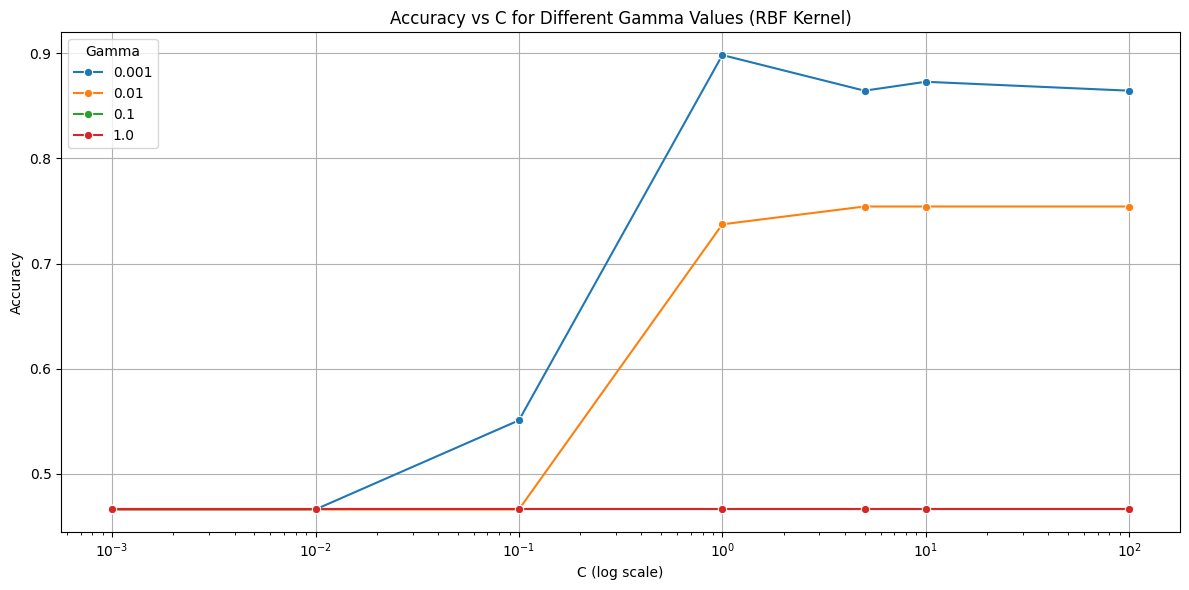

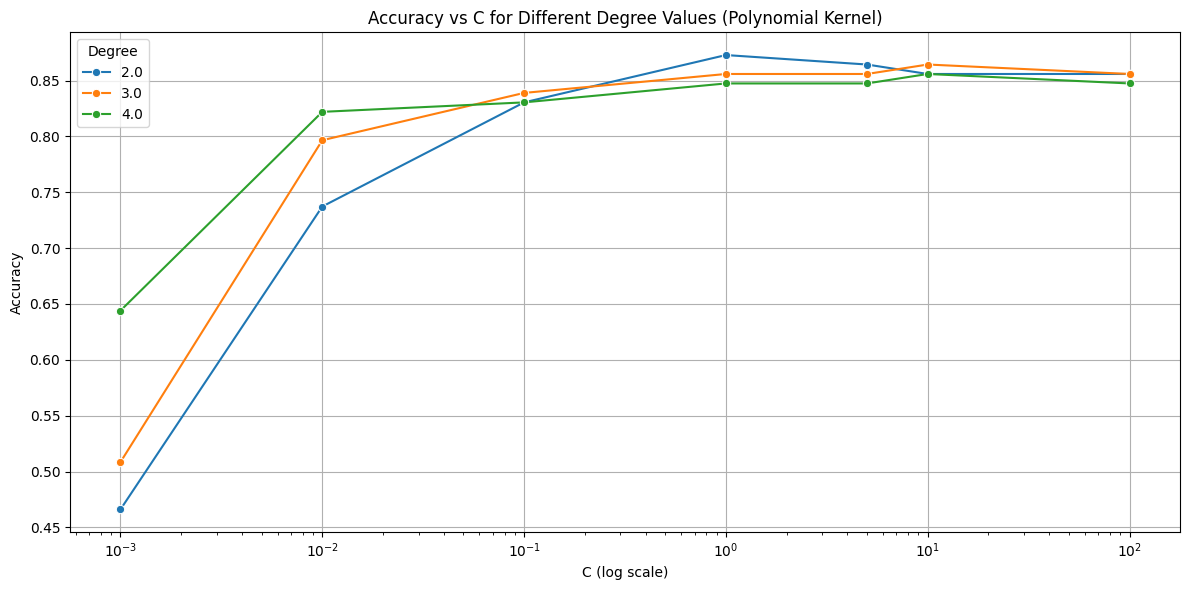

In [9]:
# Plot with Accuracy on the left y-axis
plt.figure(figsize=(12, 6))
sns.lineplot(data=q2results_df, x='C Value', y='Accuracy', marker='o', label='Accuracy', color='blue')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')
ax2 = plt.gca().twinx()
sns.lineplot(data=q2results_df, x='C Value', y='Error Rate', marker='o', label='Error Rate', color='red', ax=ax2)
ax2.set_ylabel('Error Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Accuracy and Error Rate vs C (Linear Kernel)')
plt.grid(True)
plt.tight_layout()
plt.show()

#######################################################

rbf_df = q4results_df[q4results_df['Kernel'] == 'rbf']
plt.figure(figsize=(12, 6))
sns.lineplot(data=rbf_df, x='C', y='Accuracy', hue='Gamma', marker='o', palette='tab10')
plt.xscale('log')
plt.title('Accuracy vs C for Different Gamma Values (RBF Kernel)')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.legend(title='Gamma')
plt.grid(True)
plt.tight_layout()
plt.show()

#######################################################

poly_df = q4results_df[q4results_df['Kernel'] == 'poly']
plt.figure(figsize=(12, 6))
sns.lineplot(data=poly_df, x='C', y='Accuracy', hue='Degree', marker='o', palette='tab10')
plt.xscale('log')
plt.title('Accuracy vs C for Different Degree Values (Polynomial Kernel)')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.legend(title='Degree')
plt.grid(True)
plt.tight_layout()
plt.show()
